# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



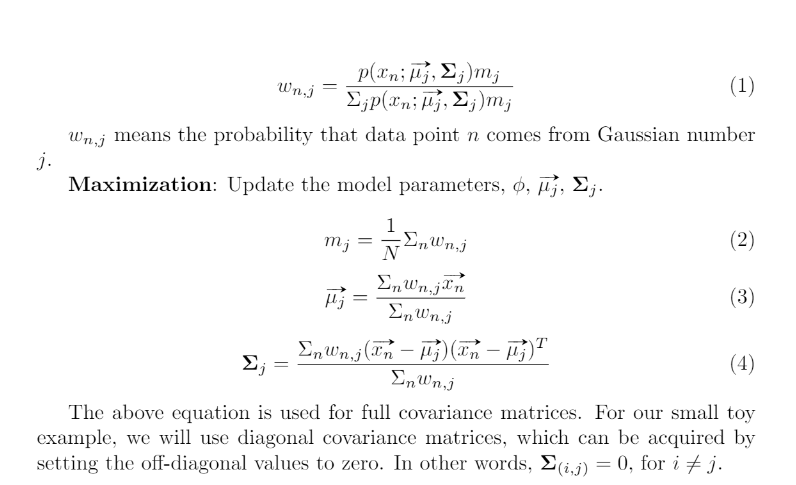

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [2]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """
        # INSERT CODE HERE
        s = np.sum(np.array([multivariate_normal.pdf(data, self.mean_params[i], self.cov_params[i]) * self.mixture_weight[i] for i in range(len(self.mean_params))]), axis=0)
        w = np.array([multivariate_normal.pdf(data, self.mean_params[i], self.cov_params[i]) * self.mixture_weight[i] for i in range(len(self.mean_params))]) / s
        return w


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        # INSERT CODE HERE
        w_j = np.sum(w, axis=1)
        self.mixture_weight = w_j / len(data)
        self.mean_params = np.matmul(w, data) / w_j.reshape(-1,1)
        cov = []
        for i in range(w_j.shape[0]):
            cov.append(np.dot(w[i] * (data - self.mean_params[i]).T ,(data - self.mean_params[i])) / w_j[i])
            cov[i][0][1]=0
            cov[i][1][0]=0
        self.cov_params = np.array(cov) 


    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        # INSERT CODE HERE
        # log_prob = np.log([multivariate_normal.pdf(data, self.mean_params[i], self.cov_params[i]) * self.mixture_weight[i] for i in range(len(self.mean_params))])
        log_prob = 1
        for x in data:
            log_prob *= np.nansum([multivariate_normal.pdf(x, self.mean_params[i], self.cov_params[i]) * self.mixture_weight[i] for i in range(len(self.mean_params))])
        # print(log_prob.shape)
        return log_prob

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            # INSERT CODE HERE

            w = self.estimation_step(data)
            self.maximization_step(data, w)

            # Calculate log prob.
            log_likelihood = self.get_log_likelihood(data)
            log_prob_list.append(log_likelihood)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()

        return log_prob_list

In [3]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1, 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.40711618 0.25954961 0.33333421]
mu :
 [[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]
-------------------------------------------------------------
Iteration

In [4]:
log_prob_list

[5.587536641467244e-18, 1.4024414354973652e-17, 1.3887237730354639e-16]

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



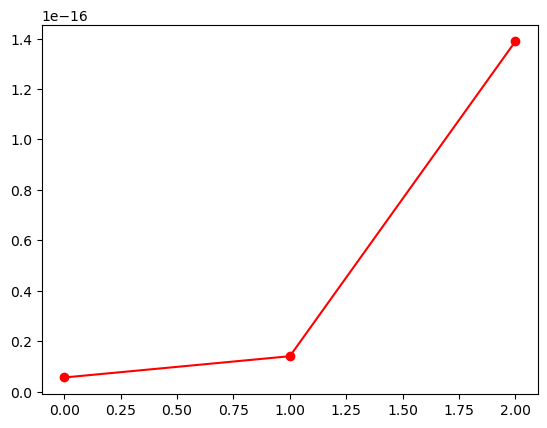

In [5]:
# TODO
plt.plot(np.arange(len(log_prob_list)),log_prob_list,color="red",marker="o")
plt.show()

    ANS : YES.

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [6]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.66669436 0.33330564]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]

 [[4.66806942 0.        ]
  [0.         2.89103318]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.66669453 0.33330547]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.66651141]]
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]

 [[4.66807754 0.        ]
  [0.         2.89104566]

Initialization
m :
[1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]  
covariance matrix :
 [[[1. 0.]
  [0. 1.]]
 [[1. 0.]
  [0. 1.]]]
  
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]  
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]
 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
  
Iteration: 1
m :
 [0.66669436 0.33330564]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]  
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]
 [[4.66806942 0.        ]
  [0.         2.89103318]]]
  
Iteration: 2
m :
 [0.66669453 0.33330547]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.66651141]]  
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]
 [[4.66807754 0.        ]
  [0.         2.89104566]]]
  

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

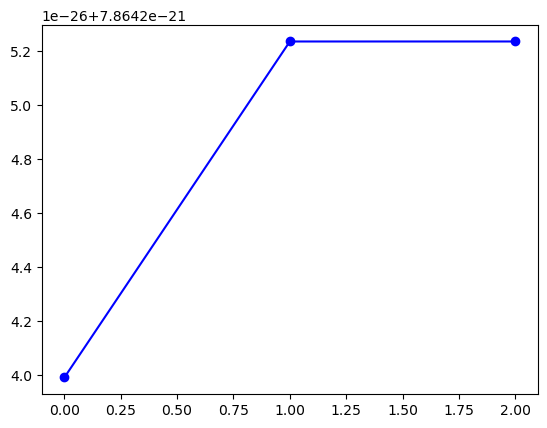

In [7]:
# TODO: Plot log_likelihood from T3
plt.plot(np.arange(len(log_prob_list2)),log_prob_list2,color="blue",marker="o")
plt.show()

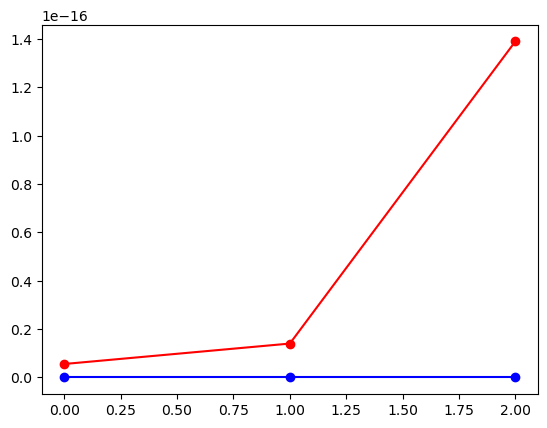

In [8]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
plt.plot(np.arange(len(log_prob_list)),log_prob_list,color="red",marker="o", label="T1")
plt.plot(np.arange(len(log_prob_list2)),log_prob_list2,color="blue",marker="o",label="T2")
plt.show()

    ANS : T1 is better.

### OT1. Using 2 mixtures, initialize your Gaussian with means (0,0) and (10000,10000). Explain what happens. From this case, explain how a proper initialization should be performed. What other tricks can be used to prevent this from happening?

In [59]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[0,0], [10000,10000]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm3 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list3 = gmm3.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1]
mu :
 [[    0.     0.]
 [10000. 10000.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------


TypeError: float() argument must be a string or a real number, not 'dict'

ANS : Starting point is so bad that weight is become 0 and got error like K-mean, can use K-mean initialization to solve this.

# The face database

In [10]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [11]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

c:\Users\Tonza\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


(40, 10)

### Preprocess xf

In [12]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

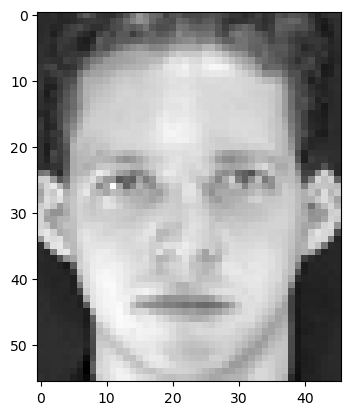

In [13]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [14]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    return np.linalg.norm(x1 - x2)

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


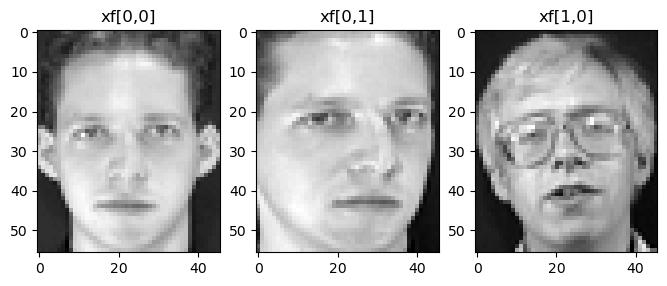

In [15]:
# TODO: Show why does the numbers make sense
fig, axs = plt.subplots(figsize=(8, 6), ncols=3)
axs[0].imshow(xf[0,0], cmap="gray")
axs[0].set_title("xf[0,0]")
axs[1].imshow(xf[0,1], cmap="gray")
axs[1].set_title("xf[0,1]")
axs[2].imshow(xf[1,0], cmap="gray")
axs[2].set_title("xf[1,0]")
plt.show()

ANS : Euclidian distance indicate similarity of images. The istance between xf[0,0] and xf[1,0] is lower (more similar) because they are in same pose.

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [16]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    return


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """
    # INSERT CODE HERE
    similarity_matrix = []
    for i in range(len(A)):
        r = []
        for j in range(len(B)):
            r.append(L2_dist(A[i], B[j]))
        similarity_matrix.append(r)

    return np.array(similarity_matrix)

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

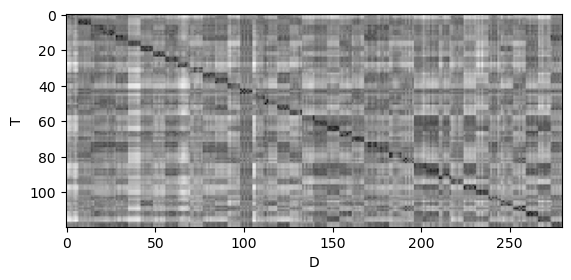

In [17]:
#TODO: Show similariry matrix between T and D.

# INSERT CODE HERE
# T = xf[:, :3]
# D = xf[:, 3:]
T, D = [], []
for i in range(xf.shape[0]):
    for j in range(xf.shape[1]):
        if j < 3:
            T.append(xf[i,j])
        else:
            D.append(xf[i,j])
T, D = np.array(T),np.array(D)
similarity_matrix = generate_similarity_matrix(T, D)
plt.xlabel("D")
plt.ylabel("T")
plt.imshow(similarity_matrix, cmap="gray",)

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


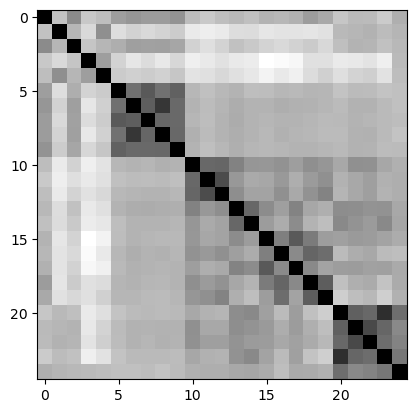

In [18]:
ex = np.array([xf[i, j] for i in range(5) for j in range(5)])
exm = generate_similarity_matrix(ex, ex)
plt.imshow(exm, cmap="gray")
plt.show()

ANS : Darker shade indicates more similarity, so the black square between [5:10,5:10] tells that images(or poses) of person 2 are very similar. But the imaegs(or poses) of person 1 is not similar (brighter shade).

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [19]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    total_unmatch = total_match = 0
    tp = tn = fp = fn = 0
    for i in range(similarity_matrix.shape[1]):
        for j in range(0, similarity_matrix.shape[0], 3):
            s = min(similarity_matrix[j : j + 3, i])
            if int(i / 7) == j / 3: # match
                total_match += 1
                if s < threshold:  
                    tp += 1
                else: 
                    fn += 1
            else: # not match
                total_unmatch += 1
                if s < threshold:  
                    fp += 1
                else: 
                    tn += 1
    return tp / total_match, fp / total_unmatch, tn / total_unmatch, fn / total_match

# Quick check
# (true_pos_rate, false_neg_rate) should be (0.9928571428571429, 0.33507326007326005)
tp, fp, tn, fn = evaluate_performance(similarity_matrix, 9.5)
print(tp, fp)

0.9928571428571429 0.33507326007326005


In [20]:
# INSERT CODE HERE
tp, fp, tn, fn = evaluate_performance(similarity_matrix, 10)
print("threshold = 10")
print("True positive rate:", tp)
print("False positive rate:", fp)

threshold = 10
True positive rate: 0.9964285714285714
False positive rate: 0.4564102564102564


ANS: True positive rate: 0.9964285714285714, False positive rate: 0.4564102564102564

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [21]:
def calculate_roc(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """

    # INSERT CODE HERE
    thresholds= np.linspace(np.min(input_mat), np.max(input_mat), 1000)
    fpr, tpr = [], []
    for t in thresholds:
        tp, fp, _, _ = evaluate_performance(input_mat, t)
        fpr.append(fp)
        tpr.append(tp)
    return np.array(tpr), np.array(fpr)

def plot_roc(input_mat):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    tpl, fpl = calculate_roc(input_mat)
    plt.plot(fpl, tpl, color='blue')
    plt.title("ROC Curve")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()
    return np.array(tpl), np.array(fpl)

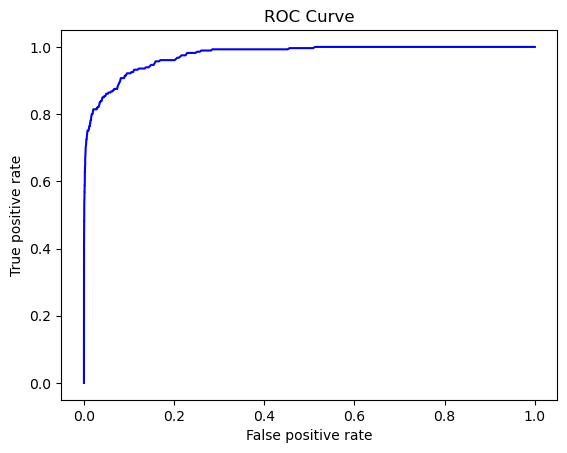

In [22]:
# INSERT CODE HERE
tpl, fpl = plot_roc(similarity_matrix)

ANS: Typically look for the point that maximize true positive rate and minimize false positive rate (The point nearest to (0, 1))

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



In [23]:
# You can add more parameter(s) to the function in the previous question.
print("ANS: ")
print("EER =", tpl[np.argmin(np.abs(fpl - (1 - tpl)))])
print("Recall rate at 0.1 percent false alarm rate =", tpl[np.argmin(np.abs(fpl - 0.001))])
# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

ANS: 
EER = 0.9071428571428571
Recall rate at 0.1 percent false alarm rate = 0.5428571428571428


### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

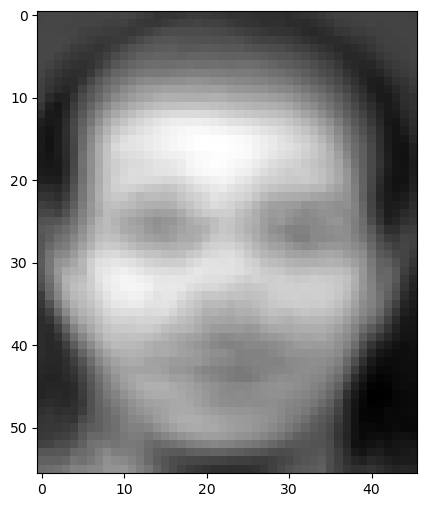

In [24]:
# INSERT CODE HERE
mean_vector = np.mean(T, axis=0)
meanface = np.reshape(mean_vector, T[0].shape)
plt.figure(figsize=(8, 6))
plt.imshow(meanface, cmap="gray")
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [25]:
# TODO: Find the size and the rank of the covariance matrix.

In [26]:
T.reshape(120, -1).shape

(120, 2576)

In [27]:
cov_matrix = np.cov(T.reshape(120, -1).T)
print("Covariance matrix size =", cov_matrix.shape)
print("Covariance matrix rank =", np.linalg.matrix_rank(cov_matrix))

Covariance matrix size = (2576, 2576)


Covariance matrix rank = 119


ANS: Covariance matrix size = (120, 120)  
Covariance matrix rank = 120


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [28]:
# TODO: Compute gram matrix.
X_hat = T.reshape(120, -1).T - mean_vector.reshape(-1, 1)
gram_matrix = np.dot(X_hat.T, X_hat)

In [29]:
# TODO: Show size and rank of Gram matrix.
print("Gram matrix size:", gram_matrix.shape)
print("Gram matrix rank:", np.linalg.matrix_rank(gram_matrix))
print("non-zero eigenvalues:", (np.linalg.eigvals(gram_matrix) > 1e-6).sum())

Gram matrix size: (120, 120)
Gram matrix rank: 119
non-zero eigenvalues: 119


ANS: Gram matrix size: (120, 120)  
Gram matrix rank: 119  
non-zero eigenvalues: 119  


## T14. Is the Gram matrix also symmetric? Why?


    ANS: 
because it is computed from $X^T \cdot X$

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [30]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [31]:
print("non-zero eigenvalues:", (eigenvalues > 1e-6).sum())

non-zero eigenvalues: 119


    ANS: 119

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

Text(0, 0.5, 'eigenvalues')

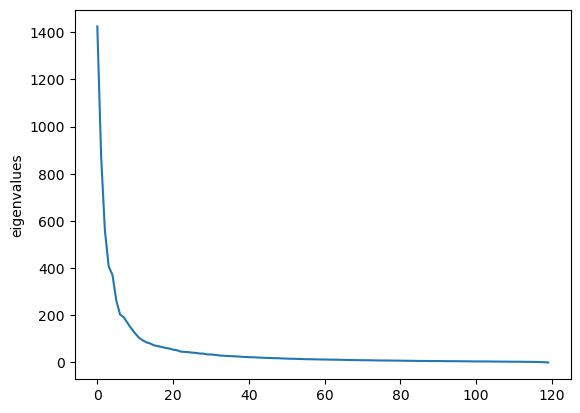

In [32]:
# INSERT CODE HERE
plt.plot(range(len(eigenvalues)),eigenvalues)
plt.ylabel("eigenvalues")

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [33]:
eigenvectors.shape

(120, 120)

In [34]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

v = np.dot(X_hat, eigenvectors)
v = v / np.linalg.norm(v, axis=0)

In [35]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

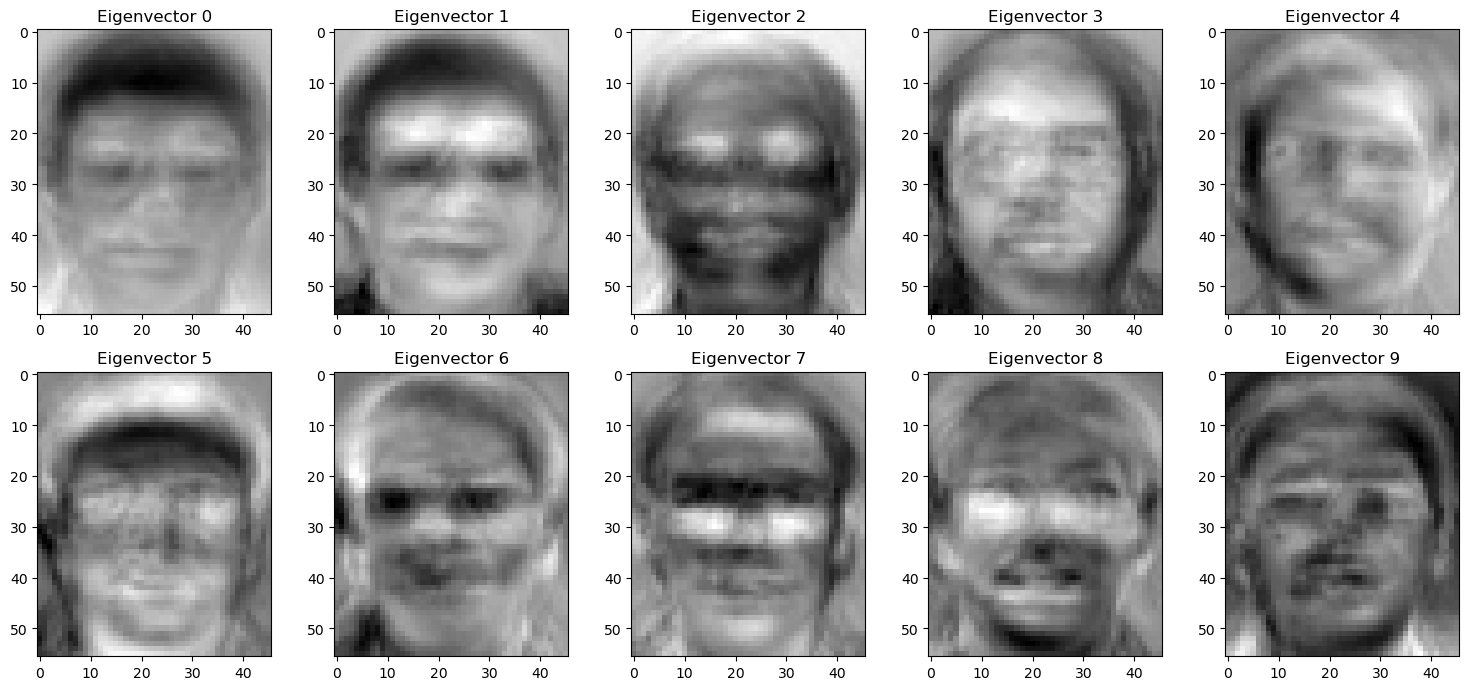

In [36]:
# TODO: Show the first 10 eigenvectors as images.

fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(1 - v[:, i].reshape(56, 46), cmap='gray')
    ax.set_title(f'Eigenvector {i}')

plt.tight_layout()
plt.show()

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

ANS: first one captures difference of hair, second one captures difference in hair, eyes, and shoulders. 

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [37]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE
    centered_X = matrix.reshape(matrix.shape[0], -1) - meanface.reshape(-1)
    # print(v.T.shape, centered_X.T.shape)
    return np.matmul(v.T, centered_X.T)

In [38]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v).T[:,:k]
D_reduced = calculate_projection_vectors(D, meanface, v).T[:,:k]

# print(T_reduced.shape)
# print(D_reduced.shape)

def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

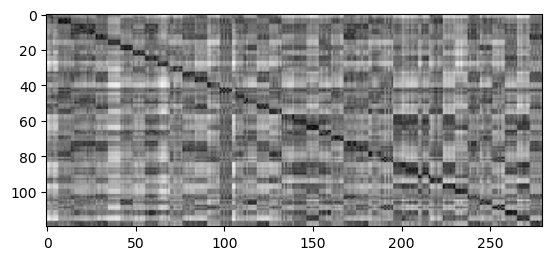

In [39]:
# TODO: Get similarity matrix of T_reduced and D_reduced
similarity_matrix_reduced = generate_similarity_matrix(T_reduced, D_reduced)
plt.imshow(similarity_matrix_reduced, cmap='gray')
plt.show()
tpr_rd, fpr_rd = calculate_roc(similarity_matrix_reduced)

In [40]:
# TODO: Find EER and the recall rate at 0.1% FAR.
print("EER =", tpr_rd[np.argmin(np.abs(fpr_rd - (1 - tpr_rd)))])
print("Recall rate at 0.1 percent false alarm rate =", tpr_rd[np.argmin(np.abs(fpr_rd - 0.001))])

EER = 0.9214285714285714
Recall rate at 0.1 percent false alarm rate = 0.5178571428571429


ANS: EER = 0.9214285714285714  
Recall rate at 0.1 percent false alarm rate = 0.5178571428571429

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [41]:
# INSERT CODE HERE
k_lst = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
EER_lst = []
T_t = calculate_projection_vectors(T, meanface, v).T
D_t = calculate_projection_vectors(D, meanface, v).T
for k in k_lst:
    similarity_matrix_t = generate_similarity_matrix(T_t[:, :k], D_t[:, :k])
    tpr_t, fpr_t = calculate_roc(similarity_matrix_t)
    EER_lst.append(tpr_t[np.argmin(np.abs(fpr_t - (1 - tpr_t)))])
mxidx = np.argmax(EER_lst)
print("Best EER is k =", mxidx + 5, "EER =", EER_lst[mxidx])

Best EER is k = 10 EER = 0.9214285714285714


    ANS: Best EER is k = 10 EER = 0.9214285714285714

### OT2. Reconstruct the first image using this procedure. Use k = 10, what is the MSE?


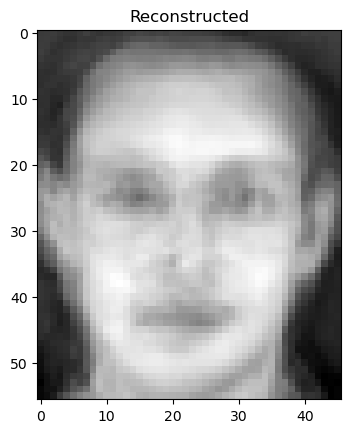

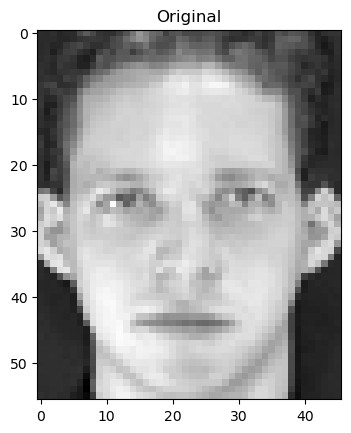

In [42]:
k = 10
X_prime = meanface.reshape(-1, 1) + np.dot(v[:, :k], calculate_projection_vectors(T, meanface, v).T[:, :k].T)
plt.imshow(X_prime[:, 0].reshape(56, 46), cmap="gray")
plt.title("Reconstructed")
plt.show()
plt.imshow(xf[0, 0].reshape(56, 46), cmap="gray")
plt.title("Original")
plt.show()

In [43]:
def MSE(a, b):
    return np.mean((a - b) ** 2)
print("MSE =", MSE(X_prime[:, 0].reshape(56, 46), xf[0, 0]))

MSE = 0.0061483350164883025


### OT3. For k values of 1,2,3,...,10,119, show the reconstructed images. Plot the MSE values.

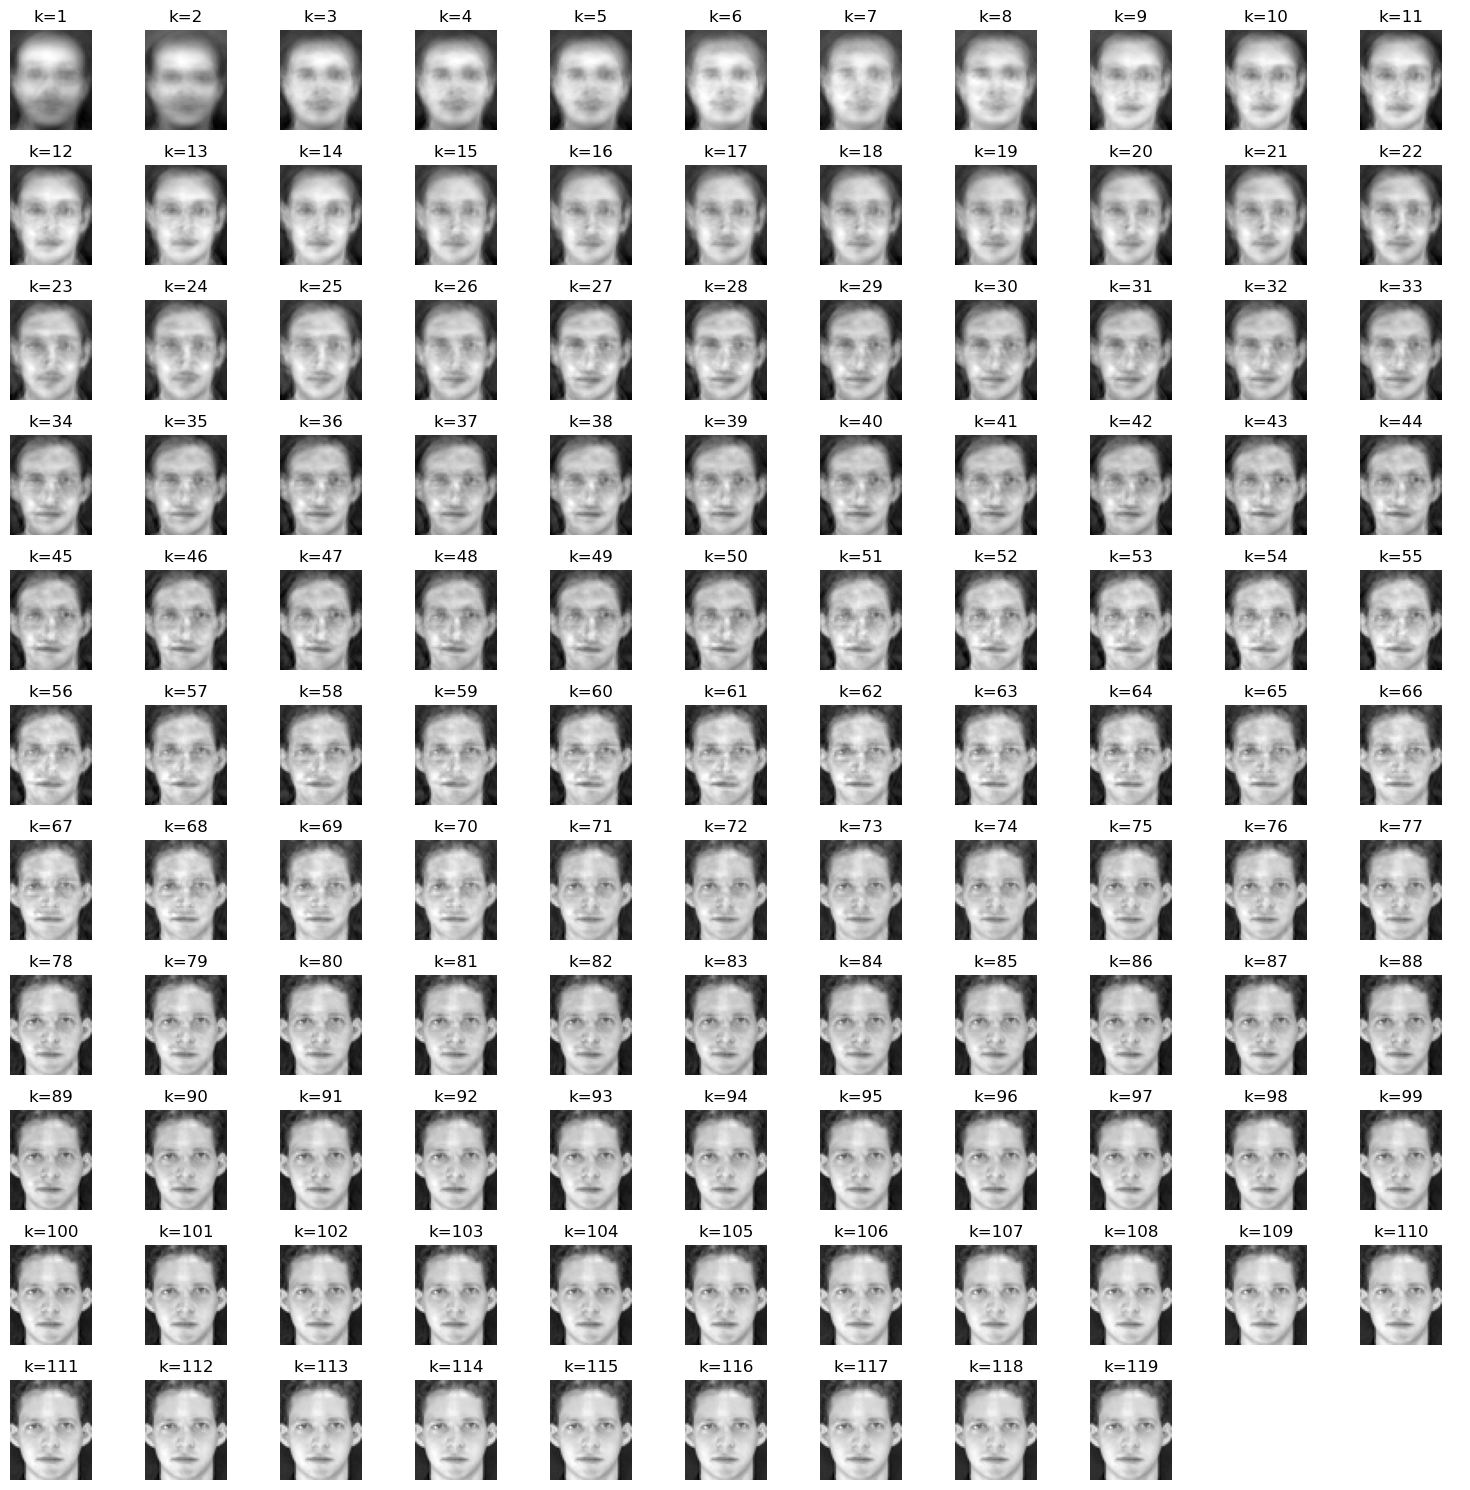

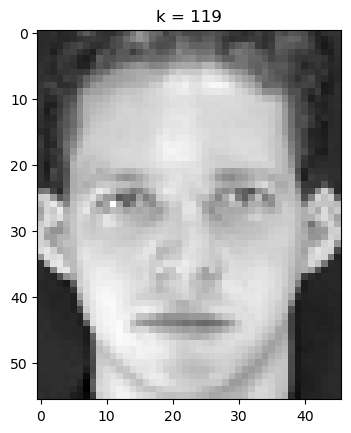

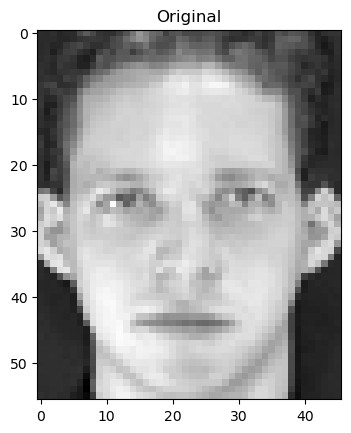

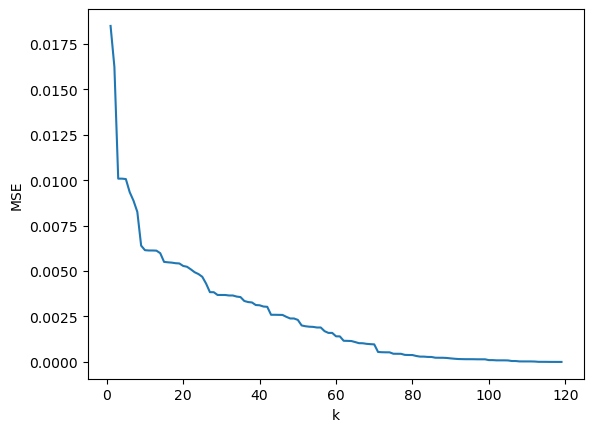

In [44]:
recons_k_lst = range(1, 120)
MSE_lst = []

num_rows = 11
num_cols = 11

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, k in enumerate(recons_k_lst):
    X_prime = meanface.reshape(-1, 1) + np.dot(v[:, :k], calculate_projection_vectors(T, meanface, v).T[:, :k].T)
    MSE_lst.append(MSE(X_prime[:, 0].reshape(56, 46), xf[0, 0]))
    # Display the reconstructed image in the subplot
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(X_prime[:, 0].reshape(56, 46), cmap="gray")
    ax.set_title(f'k={k}')
    ax.axis('off')
axes[10, 9].axis('off')
axes[10, 10].axis('off')
plt.tight_layout()
plt.show()

# k = 119
X_prime = meanface.reshape(-1, 1) + np.dot(v[:, :119], calculate_projection_vectors(T, meanface, v).T[:, :119].T)
plt.imshow(X_prime[:, 0].reshape(56, 46), cmap="gray")
plt.title("k = 119")
plt.show()
plt.imshow(xf[0, 0], cmap="gray")
plt.title("Original")
plt.show()

plt.plot(range(1, 120), MSE_lst)
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()


### OT4. Consider if we want to store 1,000,000 images of this type. How much space do we need? If we would like to compress the database by using the first 10 eigenvalues, how much space do we need? (Assume we keep the projection values, the eigenfaces, and the meanface as 32bit floats)


ANS : Image sized = 56 x 46 x 4 = 10304 bytes, 1,000,000 image ~ 10 GB  
Compress with 10 eigenvalues.  
1 projection vector = 10 x 4 = 40 bytes, total = 40 x 1,000,000 bytes = 40 MB  
1 eigenface = 10 KB, total = 100 KB  
and the meanface 10 KB  
Therefore, we need 41 MB.

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS: C = 40 (people), N = 120 (images)
$S_W$ dimensions is $N - C = 80$

In [45]:
# TODO: Define dimension of PCA.
n_dim = 80

# TODO: Find PCA of T and D with n_dim dimension.
T_PCA = calculate_projection_vectors(T, meanface, v).T[:, :n_dim]
D_PCA = calculate_projection_vectors(D, meanface, v).T[:, :n_dim]

In [46]:
T_PCA.shape

(120, 80)

### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use numpy.linalg.inv. Is $S_W^-1$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [47]:
# TODO: Find the LDA projection.
lda_mean = []
for i in range(0, T_PCA.shape[0], 3):
    lda_mean.append(((T_PCA[i]+T_PCA[i+1]+T_PCA[i+2])/3))
mean_vecs = np.array(lda_mean)
mean_vecs.shape
lda_mean = np.array(lda_mean)

global_mean = np.mean(lda_mean, axis=0)

Sb = np.dot((lda_mean - global_mean).T, (lda_mean - global_mean))

X_PCA_hat = []
for j in range(T_PCA.shape[0]):
    X_PCA_hat.append(T_PCA[j] - lda_mean[j // 3])
X_PCA_hat = np.array(X_PCA_hat)

Sw = np.dot(X_PCA_hat.T, X_PCA_hat)

lda_eig_val, lda_eig_vec =  np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))
lda_eig_vec = lda_eig_vec.T

In [48]:
print(np.dot(np.linalg.inv(Sw),Sb).shape)

(80, 80)


In [49]:
# TODO: Find how many non-zero eigenvalues there are.
print(len(lda_eig_val[lda_eig_val > 1e-6]))

39


In [50]:
lda_eig_vec = lda_eig_vec[lda_eig_val > 1e-6]
lda_eig_val = lda_eig_val[lda_eig_val > 1e-6]

In [51]:
# Symmetry check
inv_SwSb = np.dot(np.linalg.inv(Sw),Sb)
print(inv_SwSb[1, 2] == inv_SwSb.T[1, 2])

False


ANS: It is not symmetric , also cannot use numpy.linalg.eigh because the matrix input for this function need to be symmetric.

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

C:\Users\Tonza\AppData\Local\Temp\ipykernel_27116\2416010791.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  img = meanface + np.dot(v[:,:k], pca_img[i]).reshape(meanface.shape[0], -1).astype(float)


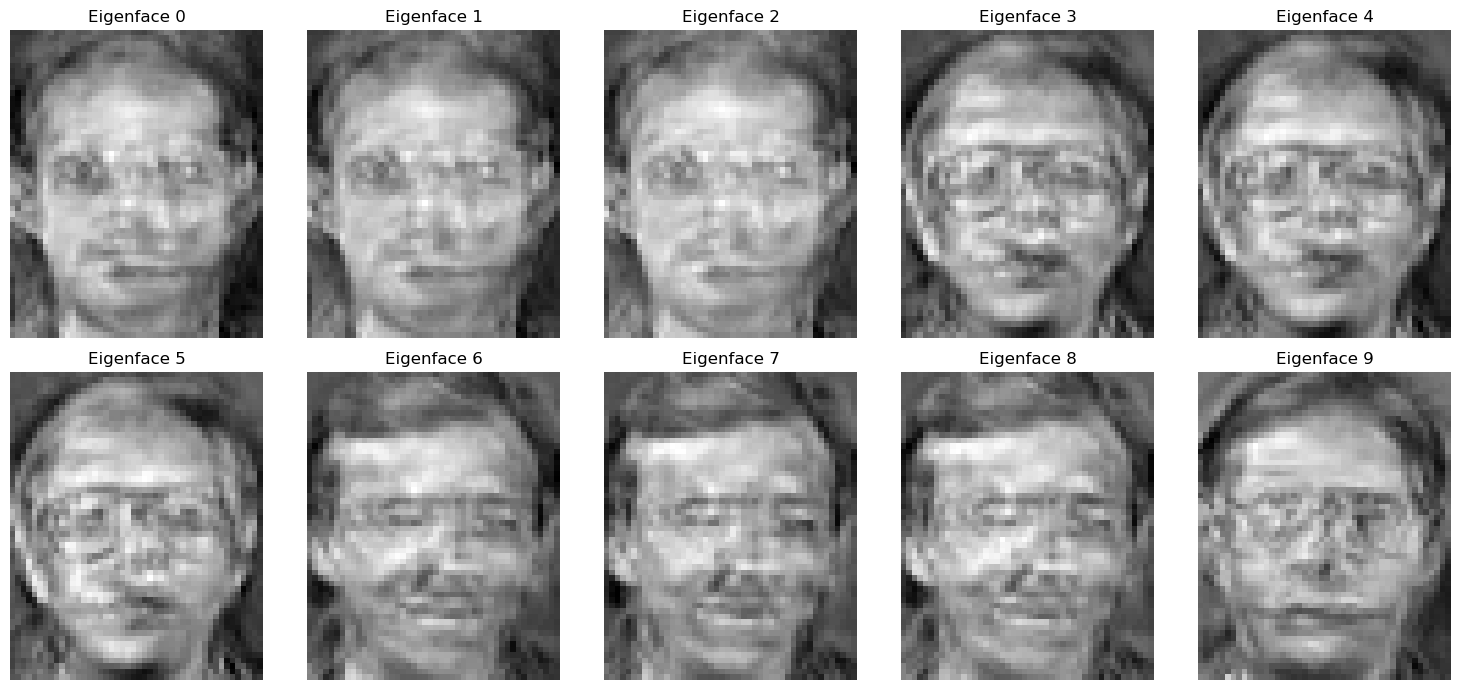

In [52]:
# INSERT CODE HERE
arg_sort = np.argsort(lda_eig_val)[::-1]
lda_eig_val = lda_eig_val[arg_sort]
lda_eig_vec = lda_eig_vec[arg_sort]

lda_img = np.dot(lda_eig_vec, T_PCA.T).T
# print(lda_img.shape)

def reconstruct(lda_img,i) :
    k = 80
    pca_img = np.dot(lda_eig_vec.T, lda_img.T).T
    # print(pca_img.shape)
    # print(v[:,:k].shape)
    img = meanface + np.dot(v[:,:k], pca_img[i]).reshape(meanface.shape[0], -1).astype(float)
    return img

num_images = 10
num_cols = 5
num_rows = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))

for i in range(num_images):
    img = reconstruct(lda_img, i)
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(img, cmap="gray")
    ax.set_title(f'Eigenface {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

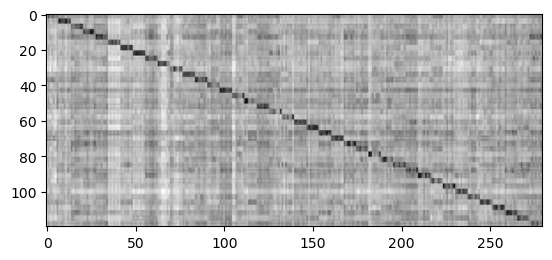

EER = 0.9285714285714286
Recall rate at 0.1 percent false alarm rate = 0.6821428571428572


In [53]:
# INSERT CODE HERE
lda_img_test = np.dot(lda_eig_vec, D_PCA.T).T
similarity_matrix_lda = generate_similarity_matrix(lda_img, lda_img_test)
plt.imshow(similarity_matrix_lda, cmap="gray")
plt.show()
tpr_lda, fpr_lda = calculate_roc(similarity_matrix_lda)
print("EER =", tpr_lda[np.argmin(np.abs(fpr_lda - (1 - tpr_lda)))])
print("Recall rate at 0.1 percent false alarm rate =", tpr_lda[np.argmin(np.abs(fpr_lda - 0.001))])

ANS: EER = 0.9285714285714286  
Recall rate at 0.1 percent false alarm rate = 0.6821428571428572

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

In [54]:
tpr_norm, fpr_norm = calculate_roc(similarity_matrix)

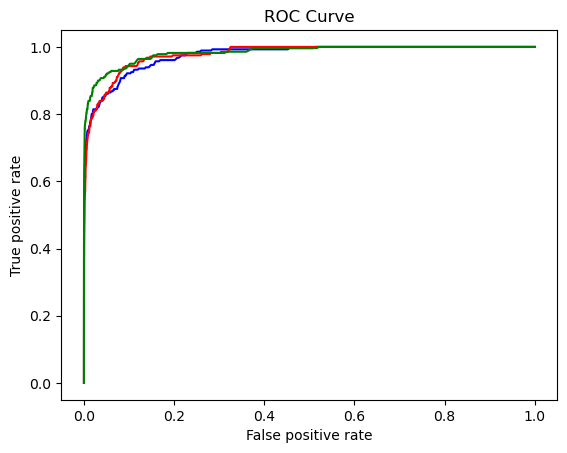

In [55]:
# INSERT CODE HERE
plt.plot(fpr_norm, tpr_norm, color='blue', label="No projection")
plt.plot(fpr_rd, tpr_rd, color='red', label="PCA")
plt.plot(fpr_lda, tpr_lda, color='green', label="Fisher")
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

    ANS: From ROC, LDA is the best performance.

### OT5. Plot the first two LDA dimensions of the test images from different people (6 people 7 images each). Use a different color for each person. Observe the clustering of between each person. Repeat the same steps for the PCA projections. Does it come out as expected?


In [56]:
lda_img_test.shape

(280, 39)

In [57]:
lda_points = lda_img_test[: 6*7, : 2]
pca_points = calculate_projection_vectors(D, meanface, v).T[: 6*7, : 2]
# shape(42, 2)

c:\Users\Tonza\anaconda3\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


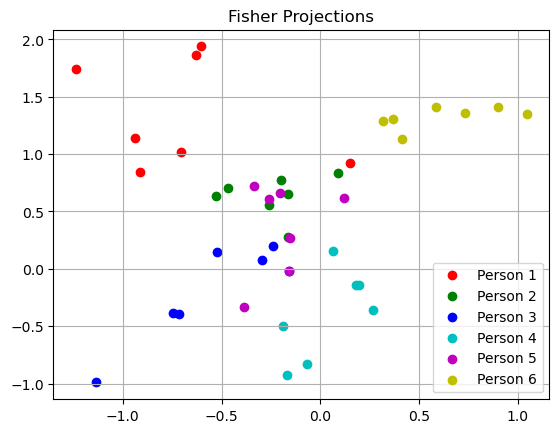

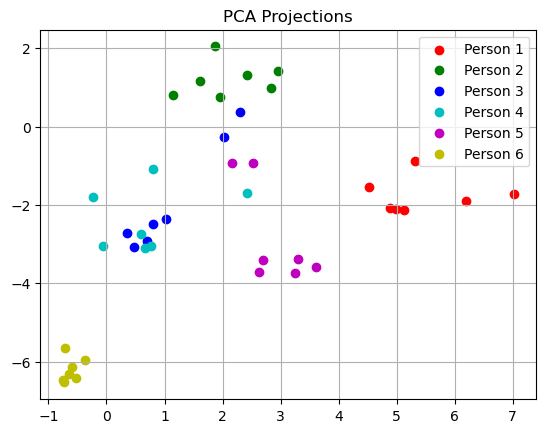

In [58]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# LDA 
for i in range(6):
    start_idx = i * 7
    end_idx = (i + 1) * 7
    plt.scatter(lda_points[start_idx:end_idx, 0], lda_points[start_idx:end_idx, 1], c=colors[i], label=f'Person {i+1}')

plt.title('Fisher Projections')
plt.legend()
plt.grid(True)
plt.show()

# PCA
for i in range(6):
    start_idx = i * 7
    end_idx = (i + 1) * 7
    plt.scatter(pca_points[start_idx:end_idx, 0], pca_points[start_idx:end_idx, 1], c=colors[i], label=f'Person {i+1}')

plt.title('PCA Projections')
plt.legend()
plt.grid(True)
plt.show()


From scatter plot, persons mostly clustered, Therefore, it comes out as expected.